# Prepoznavanje grbova klubova u Premijer Ligi

In [1]:
#Importi potrebni za rad programa
import os
import numpy as np
import cv2 # OpenCV
import time
from sklearn.svm import SVC # SVM klasifikator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
#Ucitavanje slike i konvertovanje u u sivo
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

def display_image(image):
    plt.imshow(image, 'gray')

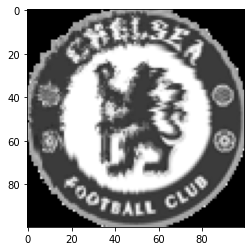

In [3]:
iche = load_image('epl-logos-big/Train/Chelsea (532).png')
display_image(iche)

In [4]:
#Ucitavanje trening i test skupa i raspodela po klubovima
start = time.time()
train_dir = 'epl-logos-big/Train/'
test_dir = 'epl-logos-big/Test2/'

che_imgs = []
ars_imgs = []
asv_imgs = []
brf_imgs = []
lee_imgs = []
lei_imgs = []
whu_imgs = []
mci_imgs = []
mun_imgs = []
tot_imgs = []

for img_name in os.listdir(train_dir):
    img_path = os.path.join(train_dir, img_name)
    img = load_image(img_path)
    if 'Chelsea' in img_name:
        che_imgs.append(img)
    elif 'Arsenal' in img_name:
        ars_imgs.append(img)
    elif 'AstonVilla' in img_name:
        asv_imgs.append(img)
    elif 'Brentford' in img_name:
        brf_imgs.append(img)
    elif 'Leeds' in img_name:
        lee_imgs.append(img)
    elif 'Leicester' in img_name:
        lei_imgs.append(img)
    elif 'Westham' in img_name:
        whu_imgs.append(img)
    elif 'ManchesterCity' in img_name:
        mci_imgs.append(img)
    elif 'ManchesterUnited' in img_name:
        mun_imgs.append(img)
    elif 'Spurs' in img_name:
        tot_imgs.append(img)
        
print("Chelsea images #: ", len(che_imgs))
print("Arsenal images #: ", len(ars_imgs))
print("Aston Villa images #: ", len(asv_imgs))
print("Brentford images #: ", len(brf_imgs))
print("Leeds images #: ", len(lee_imgs))
print("Leicester images #: ", len(lei_imgs))
print("City images #: ", len(mci_imgs))
print("United images #: ", len(mun_imgs))
print("Spurs images #: ", len(tot_imgs))
print("Westham images #: ", len(whu_imgs))

Chelsea images #:  1000
Arsenal images #:  1000
Aston Villa images #:  1000
Brentford images #:  1000
Leeds images #:  1000
Leicester images #:  1000
City images #:  1000
United images #:  1000
Spurs images #:  1000
Westham images #:  1000


In [5]:
che_features = []
asv_features = []
ars_features = []
bre_features = []
lee_features = []
lei_features = []
whu_features = []
mci_features = []
mun_features = []
tot_features = []
labels = []

nbins = 9 # broj binova
cell_size = (16, 16) # broj piksela po celiji
block_size = (4,4) # broj celija po bloku

hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1], 
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

for img in che_imgs:
    che_features.append(hog.compute(img))
    labels.append(1)

for img in asv_imgs:
    asv_features.append(hog.compute(img))
    labels.append(2)
    
for img in brf_imgs:
    bre_features.append(hog.compute(img))
    labels.append(3)

for img in ars_imgs:
    ars_features.append(hog.compute(img))
    labels.append(4)
    
for img in lee_imgs:
    lee_features.append(hog.compute(img))
    labels.append(5)

for img in lei_imgs:
    lei_features.append(hog.compute(img))
    labels.append(6)
    
for img in whu_imgs:
    whu_features.append(hog.compute(img))
    labels.append(7)

for img in mci_imgs:
    mci_features.append(hog.compute(img))
    labels.append(8)

for img in mun_imgs:
    mun_features.append(hog.compute(img))
    labels.append(9)

for img in tot_imgs:
    tot_features.append(hog.compute(img))
    labels.append(10)


che_features = np.array(che_features)
asv_features = np.array(asv_features)
bre_features = np.array(bre_features)
lee_features = np.array(lee_features)
ars_features = np.array(ars_features)
lei_features = np.array(lei_features)
whu_features = np.array(whu_features)
mci_features = np.array(mci_features)
mun_features = np.array(mun_features)
tot_features = np.array(tot_features)


print("Chelsea: ",che_features.shape)
print("Aston Villa" ,asv_features.shape)
print("Arsenal: ", ars_features.shape)
print("Brentford : ", bre_features.shape)
print("Leeds : ", lee_features.shape)
print("Leicester: ", lei_features.shape)
print("City : ", mci_features.shape)
print("United : ", mun_features.shape)
print("Spurs: ", tot_features.shape)
print("Westham : ", whu_features.shape)

x = np.vstack((che_features, asv_features,bre_features,lee_features, ars_features,lei_features,whu_features,mci_features,mun_features,tot_features))
y = np.array(labels)


Chelsea:  (1000, 1296, 1)
Aston Villa (1000, 1296, 1)
Arsenal:  (1000, 1296, 1)
Brentford :  (1000, 1296, 1)
Leeds :  (1000, 1296, 1)
Leicester:  (1000, 1296, 1)
City :  (1000, 1296, 1)
United :  (1000, 1296, 1)
Spurs:  (1000, 1296, 1)
Westham :  (1000, 1296, 1)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Train shape: ', x_train.shape, y_train.shape)
print('Test shape: ', x_test.shape, y_test.shape)

Train shape:  (8000, 1296, 1) (8000,)
Test shape:  (2000, 1296, 1) (2000,)


In [7]:
# transformisemo u oblik pogodan za scikit-learn
def reshape_data(input_data):
    nsamples, nx, ny = input_data.shape
    return input_data.reshape((nsamples, nx*ny))

x_train = reshape_data(x_train)
x_test = reshape_data(x_test)

In [8]:
print('Train shape: ', x_train.shape, y_train.shape)
print('Test shape: ', x_test.shape, y_test.shape)

Train shape:  (8000, 1296) (8000,)
Test shape:  (2000, 1296) (2000,)


In [9]:
#Random forest classifier
rfc_svm = RandomForestClassifier(max_depth=10, random_state=0)
rfc_svm.fit(x_train,y_train)
y_train_pred = rfc_svm.predict(x_train)
y_test_pred = rfc_svm.predict(x_test)
print("Train accuracy: ", accuracy_score(y_train, y_train_pred))
print("Validation accuracy: ", accuracy_score(y_test, y_test_pred))

Train accuracy:  0.99925
Validation accuracy:  0.9865


In [64]:
itest = load_image('epl-logos-big/Test/Chelsea (6).jpg')
itest2 = load_image('epl-logos-big/Test/Westham (4).jpg')
itest3 = load_image('epl-logos-big/Test/ManchesterUnited (6).jpg')
itest4 = load_image('epl-logos-big/Test/Leeds (1).jpg')
itest5 = load_image('epl-logos-big/Test/AstonVilla (7).jpg')



In [59]:
def classify_window(window):
    features = hog.compute(window).reshape(1, -1)
    return rfc_svm.predict_proba(features)[0][1]


In [12]:
def process_image(image, step_size, window_size=(100, 100)):
    best_score = 0
    best_window = None
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            this_window = (y, x) # zbog formata rezultata
            window = image[y:y+window_size[1], x:x+window_size[0]]
            if window.shape == (window_size[1], window_size[0]):
                score = classify_window(window)
                if score > best_score:
                    best_score = score
                    best_window = this_window
    return best_score, best_window

In [13]:
def jaccard_index(true_box, predicted_box):
    y_a = max(true_box[0], predicted_box[0])
    x_a = max(true_box[1], predicted_box[1])
    y_b = min(true_box[2], predicted_box[2])
    x_b = min(true_box[3], predicted_box[3])
    
    inter_area = max(0, x_b - x_a + 1) * max(0, y_b - y_a + 1)
    
    true_area = (true_box[3] - true_box[1] + 1) * (true_box[2] - true_box[0] + 1)

    pred_area = (predicted_box[3] - predicted_box[1] + 1) * (predicted_box[2] - predicted_box[0] + 1)
    
    iou = inter_area / float(true_area + pred_area - inter_area)
    
    return max(iou, 0)


In [14]:
img_scores = []

def imgs_by_team():
    for img_name in os.listdir(test_dir):
        img_path = os.path.join(test_dir, img_name)            
        img = load_image(img_path)    
        score, score_window = process_image(img, step_size=50) 
        print("{}:{}:{}".format(img_path,score,score_window))
        img_scores.append(score)


In [15]:
imgs_by_team()
score, score_window = process_image(itest, step_size=10)


epl-logos-big/Test2/Arsenal (1).jpg:0.7576479139184733:(350, 600)
epl-logos-big/Test2/Arsenal (10).jpg:0.7301318001719931:(50, 250)
epl-logos-big/Test2/Arsenal (2).jpg:0.8099183388417248:(400, 1000)
epl-logos-big/Test2/Arsenal (3).jpg:0.5881847672884772:(400, 500)
epl-logos-big/Test2/Arsenal (4).jpg:0.5257672306942299:(250, 700)
epl-logos-big/Test2/Arsenal (5).jpg:0.8436199192515426:(300, 700)
epl-logos-big/Test2/Arsenal (6).jpg:0.6713496026686397:(100, 200)
epl-logos-big/Test2/Arsenal (7).jpg:0.7841827640306595:(600, 450)
epl-logos-big/Test2/Arsenal (8).jpg:0.8704045553769802:(450, 200)
epl-logos-big/Test2/Arsenal (9).jpg:0.713546742663399:(800, 750)
epl-logos-big/Test2/AstonVilla (1).jpg:0.7150669582777218:(450, 700)
epl-logos-big/Test2/AstonVilla (10).jpg:0.614924361261984:(350, 650)
epl-logos-big/Test2/AstonVilla (2).jpg:0.7153576156817727:(650, 50)
epl-logos-big/Test2/AstonVilla (3).jpg:0.3671065224551919:(150, 150)
epl-logos-big/Test2/AstonVilla (4).jpg:0.6639493277553065:(450, 5

In [16]:
# Deo koda koji je namenjen za tesitranje pojedinacog kluba
img_scores = []
che_test_imgs = []
for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    if 'Chelsea' in img_name:    #Ovde ces posle da promenis tim
        img = load_image(img_path)
        score, score_window = process_image(img, step_size=30)
        print("{}:{}".format(img_path,score))
        img_scores.append(score)

epl-logos-big/Test2/Chelsea (1).jpg:0.769339800563802
epl-logos-big/Test2/Chelsea (10).jpg:0.7653451680222935
epl-logos-big/Test2/Chelsea (2).jpg:0.754927439156324
epl-logos-big/Test2/Chelsea (3).jpg:0.7757627921690577
epl-logos-big/Test2/Chelsea (4).jpg:0.7714823808099054
epl-logos-big/Test2/Chelsea (5).jpg:0.7494567270806385
epl-logos-big/Test2/Chelsea (6).jpg:0.6384332196463621
epl-logos-big/Test2/Chelsea (7).jpg:0.7995352699341872
epl-logos-big/Test2/Chelsea (8).jpg:0.7806749596058741
epl-logos-big/Test2/Chelsea (9).jpg:0.7827120519206047


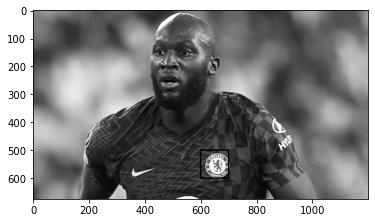

In [44]:
#Provera testne slike

cv2.rectangle(itest,(700,500),(600,600),(0,0,255),3)
display_image(itest)



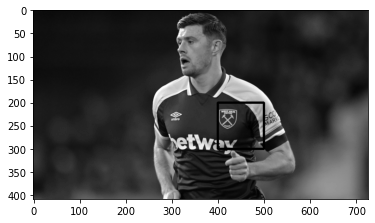

In [50]:
cv2.rectangle(itest2,(400,200),(500,300),(0,0,255),3)
display_image(itest2)

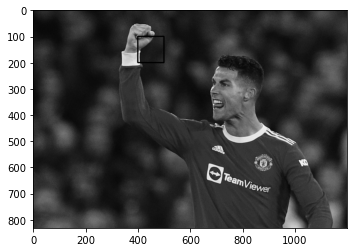

In [53]:
cv2.rectangle(itest3,(400,100),(500,200),(0,0,255),3)
display_image(itest3)

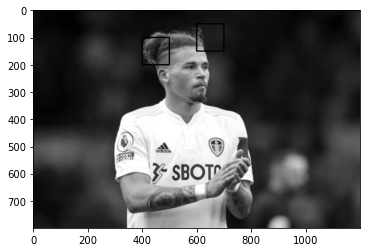

In [61]:
cv2.rectangle(itest4,(600,50),(700,150),(0,0,255),3)
display_image(itest4)

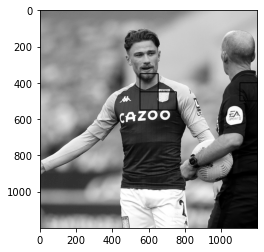

In [68]:
cv2.rectangle(itest5,(650,450),(750,550),(0,0,255),3)
display_image(itest5)

In [ ]:
#racunanje ukupnog procenta i vreme izvrsavanja
sum = 0
for avg in img_scores:
    sum += avg
    avg_score = sum / 100
    
print(avg_score)
end = time.time()
print(end - start)